<a href="https://colab.research.google.com/github/omuskaikar/Profit-Prediction-For-Super-Store/blob/main/ML_Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA**

##Loading the data & Preprocessing

In [ ]:
#importing all libraries needed for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
!pip install bar_chart_race
import bar_chart_race as bcr
import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('/content/Superstore Dataset (1).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
#@title
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#These columns are redundant so we drop them(only one country)
df=df.drop({'Row ID','Country'}, axis=1)

In [ ]:
df.head(5)
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  9994
Number of Columns:  19


In [ ]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

data doesn't contain null values

In [ ]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [ ]:
#Check the datatypes for all the data
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
df.duplicated().sum()

1

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Shipping Time**

*   Year of the order
*   Month of the order
*   Day of the order



In [ ]:
df['order_ship_time']= df['Ship Date'] - df['Order Date']
df['order_year']= df['Order Date'].dt.year
df['order_month']=df['Order Date'].dt.strftime("%b")
df['order_day']=df['Order Date'].dt.strftime("%a")
df["order_ship_time"]=df['order_ship_time'].dt.days
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,order_ship_time,order_year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,2015.722233
std,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,1.123555
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2014.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,2015.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,2016.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,2017.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,2017.000000


**The shippment time is 4 days on average. The profit is negative. Negative profit means loss. Lets determine the number of customers who have losses**

In [ ]:
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month
df['OrderD'] = df['Order Date'].dt.day
df = df.drop(['order_year', 'order_month', 'order_day'], axis=1)

In [ ]:
df[df['Profit']<0]['Customer ID'].count()/df['Customer ID'].count()

0.18721232739643787

**18% of the accounts have losses Create a flag to determine profit or loss**

In [ ]:
df.loc[:,'is_profit']=np.where(df['Profit']>0,1,0)

In [ ]:
df.dtypes
list_cateog=df.select_dtypes(include='object').columns.tolist()
print("Cateogrical Variables: \n")
list_cateog

Cateogrical Variables: 



['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [ ]:
list_non_cateog=list(set(df.columns.tolist())- set(list_cateog))
print("Numerical Variables: \n")
list_non_cateog

Numerical Variables: 



['Sales',
 'Profit',
 'is_profit',
 'Postal Code',
 'Discount',
 'Order Date',
 'OrderM',
 'order_ship_time',
 'OrderD',
 'Quantity',
 'Ship Date',
 'OrderY']

In [ ]:
df.dtypes
list_cateog=df.select_dtypes(include='object').columns.tolist()
print("Cateogrical Variables: \n")
list_cateog

Cateogrical Variables: 



['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [ ]:
list_non_cateog=list(set(df.columns.tolist())- set(list_cateog))
print("Numerical Variables: \n")
list_non_cateog

Numerical Variables: 



['Sales',
 'Profit',
 'is_profit',
 'Postal Code',
 'Discount',
 'Order Date',
 'OrderM',
 'order_ship_time',
 'OrderD',
 'Quantity',
 'Ship Date',
 'OrderY']

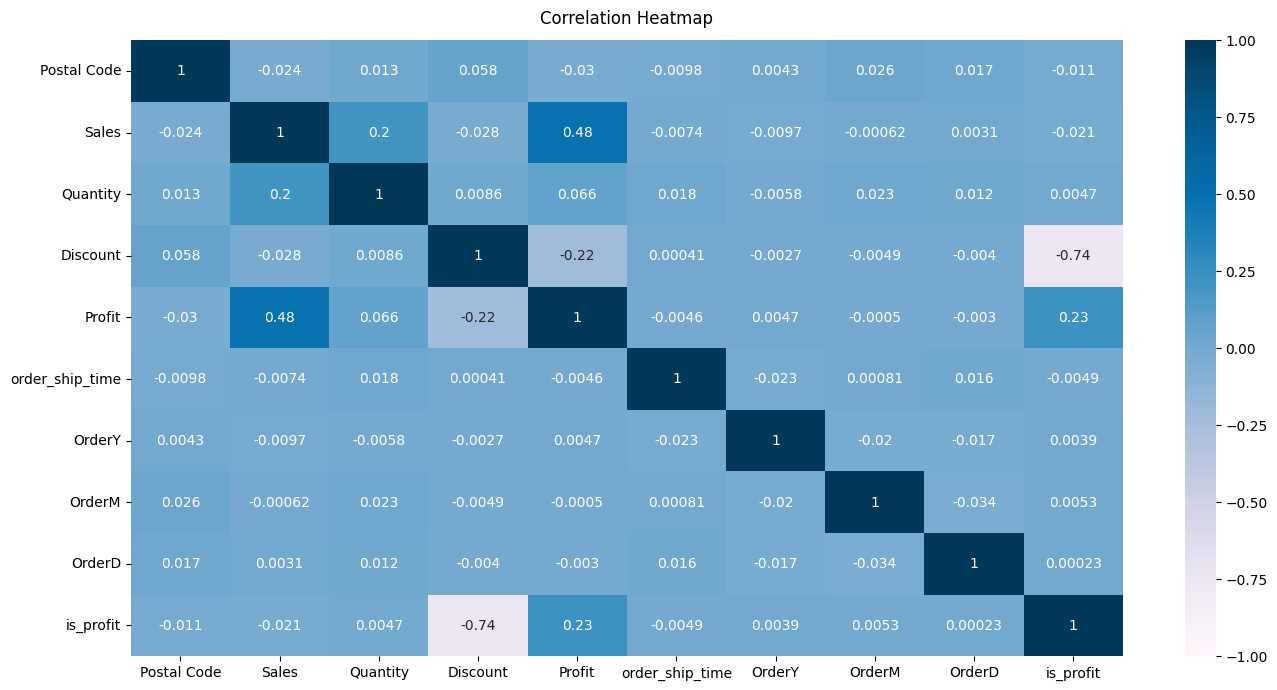

In [ ]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap="PuBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

this shows discount and profit have high negative correlated

##Analysing Distribution of data in given attribute

<Axes: xlabel='Sales', ylabel='Profit'>

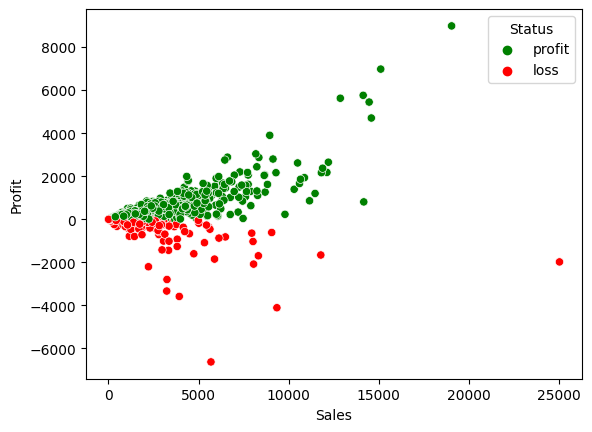

In [ ]:
# calculate sales and profit by customer
df_customer = pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit'] = pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

# define function to map profit to colors
def type(ex):
    if ex < 0:
        return 'loss'
    else:
        return 'profit'

# apply function to create color column
df_customer['Status'] = df_customer['Profit'].apply(type)

# create color map
color_map = {'profit': 'green', 'loss': 'red'}

# create scatterplot with modified color map
sns.scatterplot(data=df_customer, hue='Status', palette=color_map, x='Sales', y='Profit')

<Axes: xlabel='Sales', ylabel='Category'>

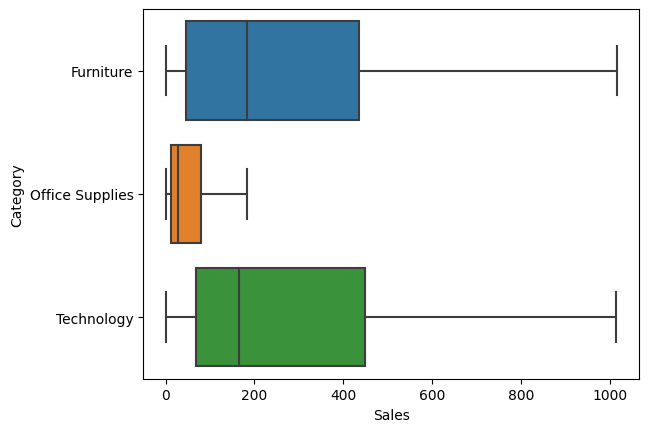

In [ ]:
sns.boxplot(x='Sales', y='Category', data=df, showfliers=False)

no outliers in catgory

In [ ]:
#function to plot multiple boxplot with filtering
import math

def multiple_eda_continuous(df, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set3', 10)

    for i, variable in enumerate(list_continuous):
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df.loc[(df[variable] > lower_bound) & (df[variable] < upper_bound)]
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=df_filtered, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()


In [ ]:
cols=["Discount","Quantity","order_ship_time","Sales","Profit","OrderD"]
for i in cols:
    print(f"Skewness {i} : " + str(df[i].skew()))

Skewness Discount : 1.6842947474238648
Skewness Quantity : 1.2785447527223421
Skewness order_ship_time : -0.42132234579863354
Skewness Sales : 12.97275234181623
Skewness Profit : 7.561431562468343
Skewness OrderD : 0.01741397863381775


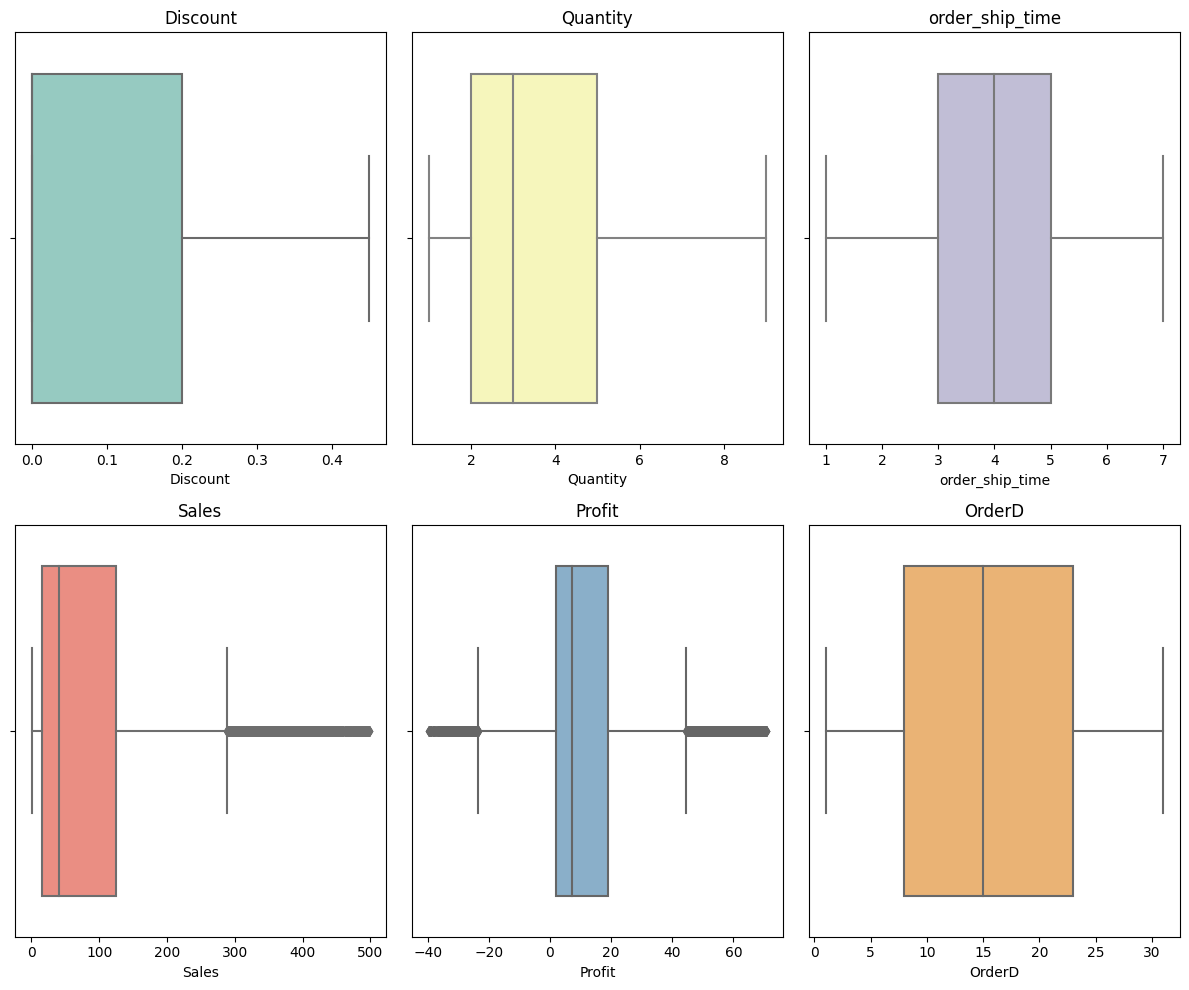

In [ ]:
multiple_eda_continuous(df, cols)

there are outliers in sales and profit so we will apply machine learning algorithms accordingly

In [ ]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))


In [ ]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

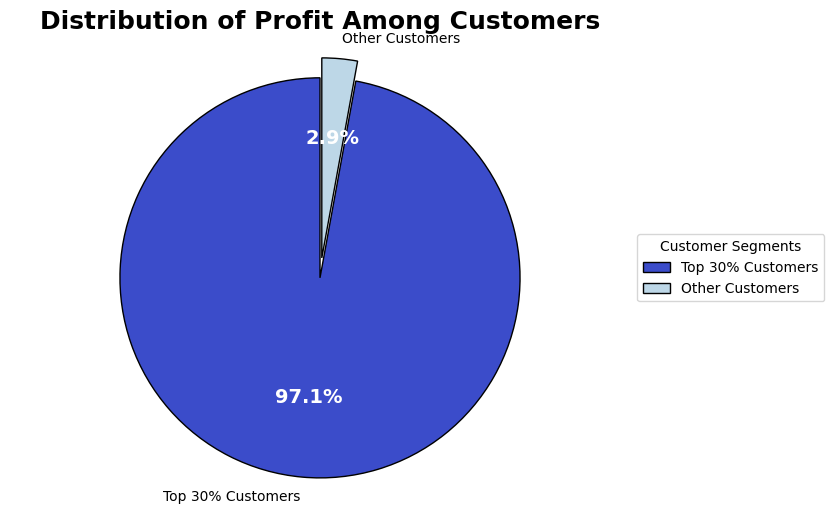

In [ ]:
# Calculate the total profit and profit of top 30% customers
top_profit_customers_sum = df2[df2['Profit']>=463.269].sum()[0]
total_profit = df['Profit'].sum()

# Create the sizes, labels and colors for the pie chart
sizes = [top_profit_customers_sum, total_profit - top_profit_customers_sum]
labels = ['Top 30% Customers', 'Other Customers']
colors = ['#3B4CCA', '#BDD7E7']
explode = [0.1, 0]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor':'black'})
ax.axis('equal')

# Set the properties of the text inside the wedges
plt.setp(autotexts, size=14, weight="bold", color="white")

# Add a legend to the chart
plt.legend(wedges, labels, title="Customer Segments", loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title to the chart
plt.title('Distribution of Profit Among Customers', fontsize=18, fontweight='bold')

# Show the plot
plt.show()


**Top 30% occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important!**

In [ ]:
import math
import matplotlib.pyplot as plt

def multiple_eda_continuous(df, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig, axes = plt.subplots(n_rows, 3, figsize=(12,n_rows*5))
    palette = sns.color_palette('Set3', 10)

    for i, variable in enumerate(list_continuous):
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df.loc[(df[variable] > lower_bound) & (df[variable] < upper_bound)]
        row = i // 3
        col = i % 3
        ax = axes[row][col]
        sns.histplot(data=df_filtered, x=variable, kde=True, color=palette[i], ax=ax)
        ax.set_xlabel(variable)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [ ]:
cols=["Discount","Quantity","order_ship_time","Sales","Profit","OrderD"]
for i in cols:
    print(f"Skewness {i} : " + str(df[i].skew()))

Skewness Discount : 1.6842947474238648
Skewness Quantity : 1.2785447527223421
Skewness order_ship_time : -0.42132234579863354
Skewness Sales : 12.97275234181623
Skewness Profit : 7.561431562468343
Skewness OrderD : 0.01741397863381775


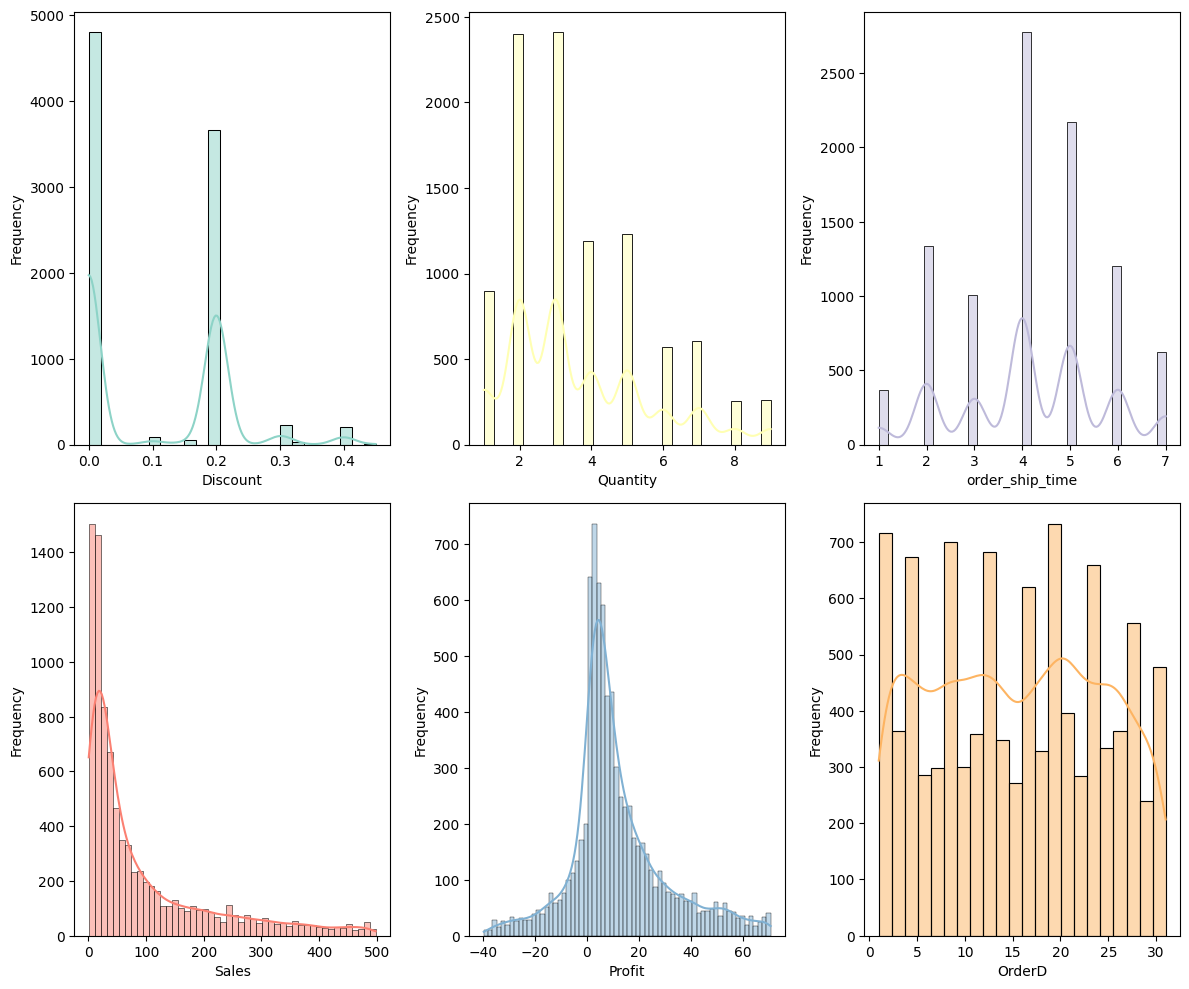

In [ ]:
multiple_eda_continuous(df, cols)

**Finding the most repeated values of categorical data**

In [ ]:
cat_df = df.select_dtypes(include=['object'])

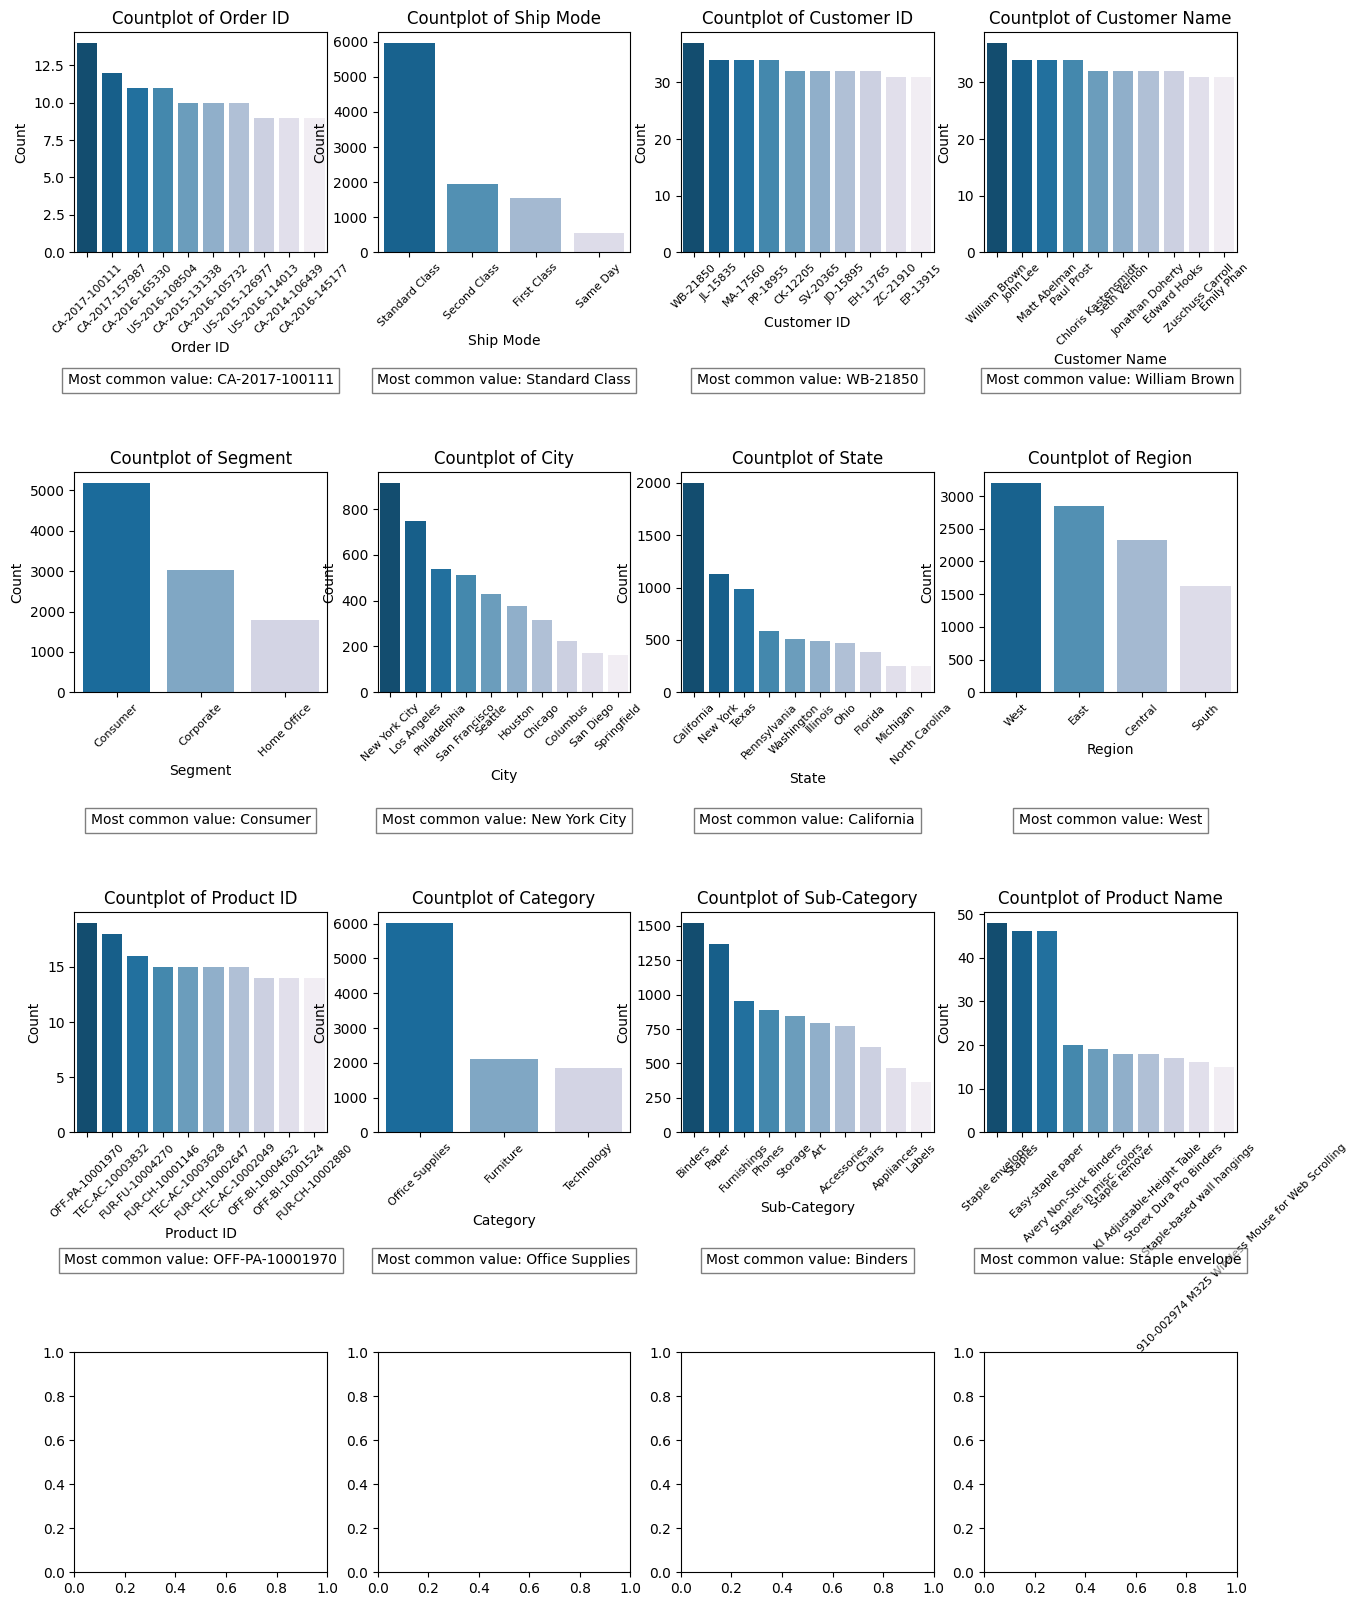

In [ ]:
# Define the number of rows and columns for the subplots
rows = 4
cols = 4

# Define the height ratios for the subplots
height_ratios = [4] * rows

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20), gridspec_kw={'height_ratios': height_ratios, 'hspace':1})

# Loop through the categorical variables and plot countplots on each axis
for i, var in enumerate(cat_df.columns):
    row = i // cols
    col = i % cols
    sns.countplot(x=var, data=cat_df, order=cat_df[var].value_counts().index[:10], palette='PuBu_r', ax=ax[row][col])
    ax[row][col].set_title(f'Countplot of {var}', fontsize=12)
    ax[row][col].set_xlabel(var, fontsize=10)
    ax[row][col].set_ylabel('Count', fontsize=10)
    ax[row][col].tick_params(axis='x', rotation=45, labelsize=8)

    # Add annotation with the count of the most common value
    top_val = cat_df[var].value_counts().index[0]
    top_count = cat_df[var].value_counts()[0]

    # Add text box with the most common value below the plot
    ax[row][col].text(0.5, -0.6, f'Most common value: {top_val}', transform=ax[row][col].transAxes, ha='center', bbox=dict(facecolor='white', alpha=0.5))


# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


##Analysis based on shipment mode, segment and category

In [ ]:
Sales_by_Segment = df.groupby('Segment')['Sales'].sum().reset_index()

fig = px.pie(Sales_by_Segment,
             values='Sales',
             names='Segment',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Segment', title_font=dict(size=24),
                  width=1000, height=800)
fig.show()


In [ ]:
#@title
sales_profit_by_Segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
color_palette = px.colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_Segment['Segment'],
                     y=sales_profit_by_Segment['Sales'],
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_Segment['Segment'],
                     y=sales_profit_by_Segment['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')
fig.show()

**CONCLUSION:- Based on the Chart above, it can be concluded that the most of the customers are in Consumer Segment, followed by Corporate and lowest in Home Office**

In [ ]:
#@title
Sales_by_Ship_Mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

fig = px.pie(Sales_by_Ship_Mode,
             values='Sales',
             names='Ship Mode',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Ship Mode', title_font=dict(size=24),
                  width=1000, height=800)
fig.show()


In [ ]:
#@title
sales_profit_by_Ship_Mode = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = px.colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_Ship_Mode['Ship Mode'],
                     y=sales_profit_by_Ship_Mode['Sales'],
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_Ship_Mode['Ship Mode'],
                     y=sales_profit_by_Ship_Mode['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Ship Mode',
                  xaxis_title='Customer Ship Mode', yaxis_title='Amount')

fig.show()

**CONCLUSION:- Most of the shipping happens via the Standard Class, followed by Second Class and First Class. Very little shipping happens via the Same Day**

In [ ]:
#@title
Sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(Sales_by_category,
             values='Sales',
             names='Category',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24),
                  width=1000, height=800)
fig.show()

In [ ]:
#@title
sales_profit_by_Category = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = px.colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_Category['Category'],
                     y=sales_profit_by_Category['Sales'],
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_Category['Category'],
                     y=sales_profit_by_Category['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Category',
                  xaxis_title='Customer Category', yaxis_title='Amount')

fig.show()


**CONCLUSION:- Maximum profit comes from Technology**

## Analysing Profits based on category and Sub-category

In [ ]:
# Create a new DataFrame with total profit for each sub-category
subcat_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Sort the subcategories by total profit in descending order
subcat_profit = subcat_profit.sort_values(by='Profit', ascending=False)
subcat_profit

,Category,Sub-Category,Profit
14,Technology,Copiers,55617.8249
16,Technology,Phones,44515.7306
13,Technology,Accessories,41936.6357
10,Office Supplies,Paper,34053.5693
6,Office Supplies,Binders,30221.7633
1,Furniture,Chairs,26590.1663
11,Office Supplies,Storage,21278.8264
4,Office Supplies,Appliances,18138.0054
2,Furniture,Furnishings,13059.1436
7,Office Supplies,Envelopes,6964.1767


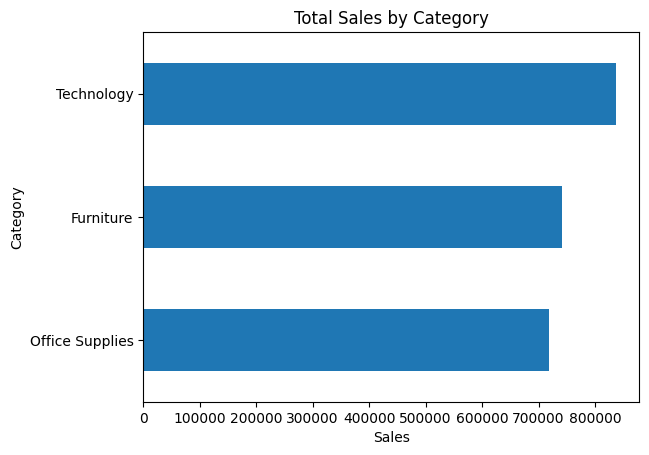

In [ ]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)
ax = sales_by_category.plot.barh()
ax.set_title('Total Sales by Category')
ax.set_xlabel('Sales')
ax.set_ylabel('Category')
plt.show()

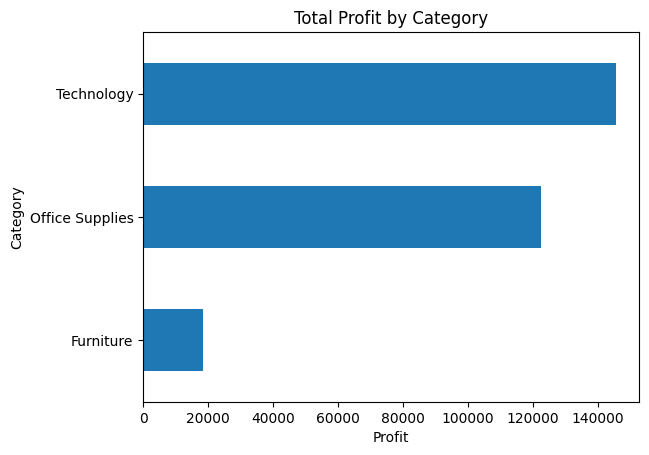

In [ ]:
Profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)
ax = Profit_by_category.plot.barh()
ax.set_title('Total Profit by Category')
ax.set_xlabel('Profit')
ax.set_ylabel('Category')
plt.show()

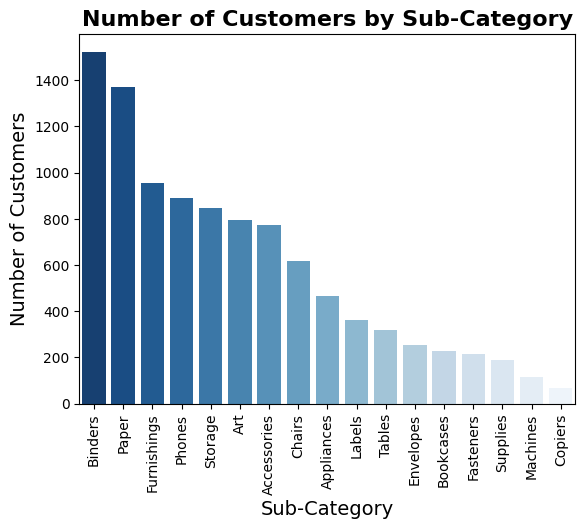

In [ ]:
import seaborn as sns

# Sort the subcategories by number of customers in descending order
subcat_counts = df['Sub-Category'].value_counts().sort_values(ascending=False)

# Define a color palette with a gradient from light to dark red
palette = sns.color_palette('Blues_r', n_colors=len(subcat_counts))

# Create the bar plot with the sorted subcategories and the color gradient
sns.barplot(x=subcat_counts.index, y=subcat_counts.values, palette=palette)

# Set the x-axis label to 'Sub-Category' and the y-axis label to 'Number of Customers'
plt.xlabel('Sub-Category', size=14)
plt.ylabel('Number of Customers', size=14)

# Rotate the x-tick labels vertically
plt.xticks(rotation='vertical')

# Set the plot title
plt.title('Number of Customers by Sub-Category', size=16, weight='bold')

# Show the plot
plt.show()

**Splitting by Sub-Cateogry shows that the most of the products sold are Binders, Papers which should be the part of office supplies.**

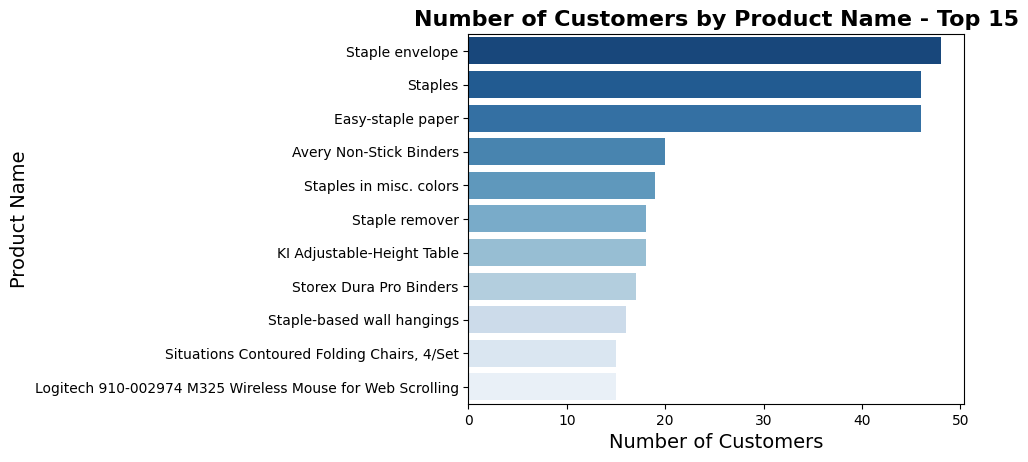

In [ ]:
import seaborn as sns
product_counts = df['Product Name'].value_counts().sort_values(ascending=False)
product_freq = product_counts[product_counts >= 15]
sns.barplot(x=product_freq.values, y=product_freq.index, palette='Blues_r')
plt.xlabel('Number of Customers', size=14)
plt.ylabel('Product Name', size=14)
plt.title('Number of Customers by Product Name - Top 15', size=16, weight='bold')
plt.show()

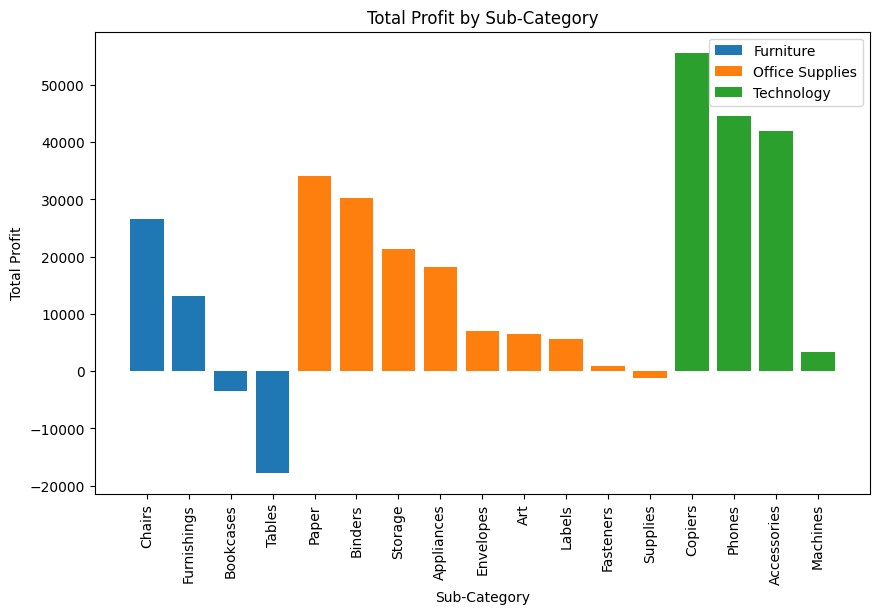

In [ ]:
# Define a color map for each category
colors = {'Furniture': 'tab:blue', 'Office Supplies': 'tab:orange', 'Technology': 'tab:green'}

# Create a bar plot with the color map
fig, ax = plt.subplots(figsize=(10, 6))
for cat, grp in subcat_profit.groupby('Category'):
    ax.bar(grp['Sub-Category'], grp['Profit'], color=colors[cat], label=cat)
# Add labels and title
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Total Profit')
ax.set_title('Total Profit by Sub-Category')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add legend
plt.legend()
# Show plot
plt.show()

**CONCLUSION: Profit of Technology is highest among all categories**

##Time-Series Analysis

In [ ]:
monthly_sales = df.groupby(['OrderY', 'OrderM'])['Sales'].sum()
monthly_profit = df.groupby(['OrderY', 'OrderM'])['Profit'].sum()
monthly_data = pd.concat([monthly_sales, monthly_profit], axis=1)
monthly_data.reset_index(inplace=True)
monthly_data.columns = ['Year', 'Month', 'Sales', 'Profit']
monthly_data.head(5)

,Year,Month,Sales,Profit
0,2014,1,14236.895,2450.1907
1,2014,2,4519.892,862.3084
2,2014,3,55691.009,498.7299
3,2014,4,28295.345,3488.8352
4,2014,5,23648.287,2738.7096


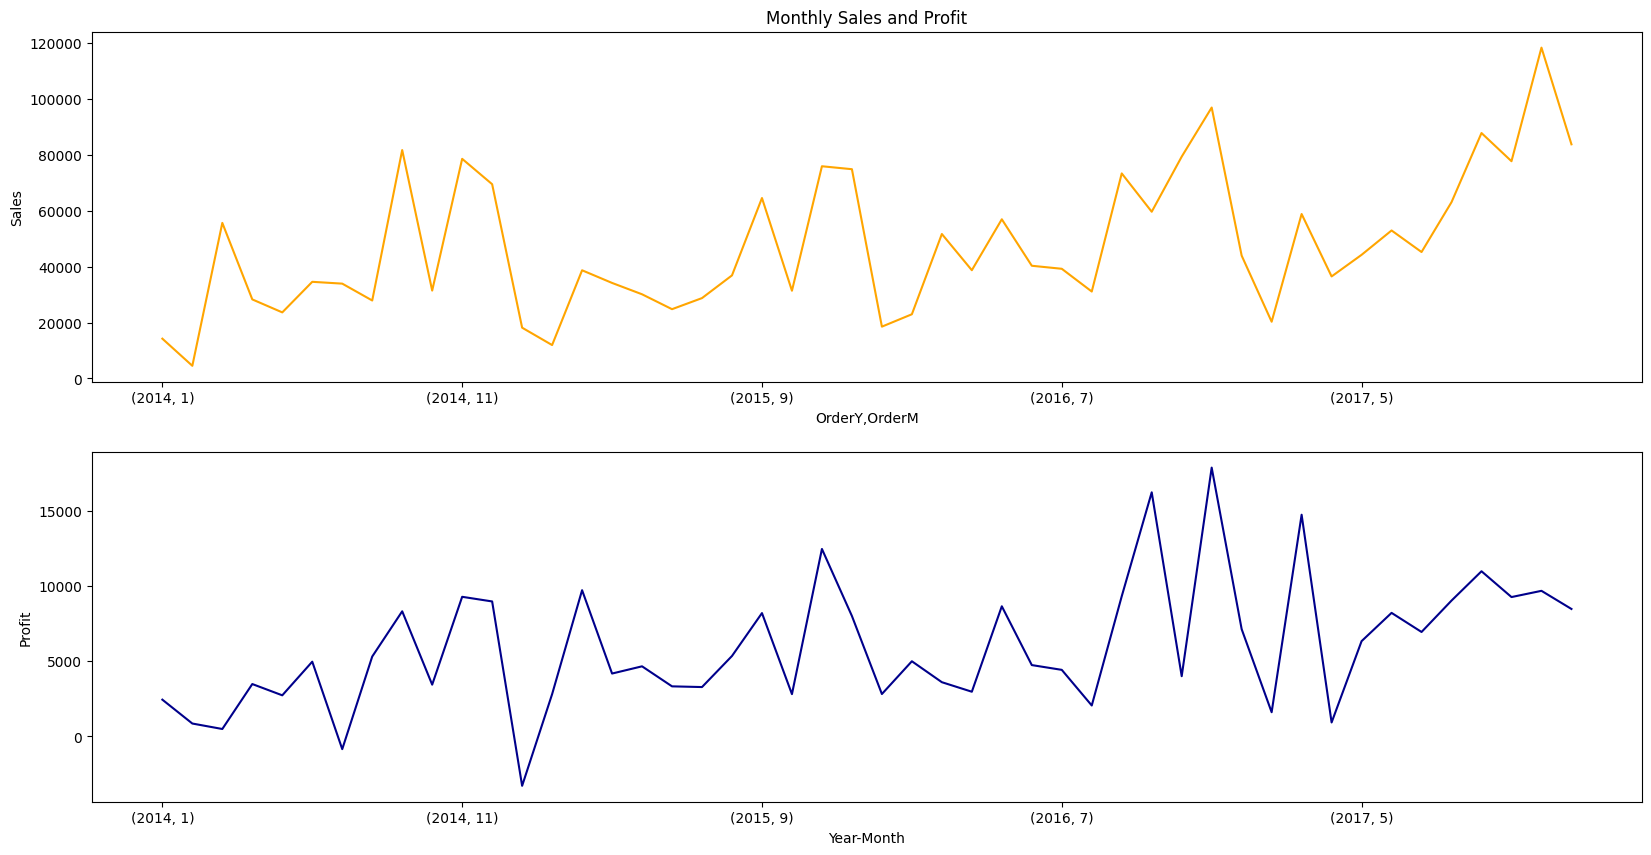

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
# Plot sales data on first subplot
monthly_sales.plot(kind='line', ax=ax1, color='orange')
ax1.set_ylabel('Sales')
ax1.set_title('Monthly Sales and Profit')
# Plot profit data on second subplot
monthly_profit.plot(kind='line', ax=ax2, color='darkblue')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Profit')
# Show plot
plt.show()

**This represents the sales & profit vs month of the year over the period of 2014-2017**

In [ ]:
# create a dictionary mapping state names to state codes
state_codes = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
               'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
               'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
               'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
               'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
               'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
               'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
               'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
               'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
               'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

# create a new column with state codes
profits_by_state = df.groupby(['State','OrderY'])['Profit'].sum().reset_index()
profits_by_state = profits_by_state.rename(columns={'OrderY':'Year'})
profits_by_state['state_code'] = profits_by_state['State'].map(state_codes)
# merge with df and select relevant columns
profits_by_state.head(5)


,State,Year,Profit,state_code
0,Alabama,2014,1250.7324,AL
1,Alabama,2015,1199.7854,AL
2,Alabama,2016,2839.9304,AL
3,Alabama,2017,496.3771,AL
4,Arizona,2014,-903.1981,AZ


In [ ]:
fig = px.choropleth(profits_by_state, locations='state_code', locationmode='USA-states',
                    color='Profit', scope='usa', hover_data=['Profit', 'State'],
                    hover_name='State', animation_frame='Year',
                    title='Profit by State')

# customize the layout
fig.update_layout(
    title={
        'text': "<b>Profit by State</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=600, width=900,
    geo=dict(bgcolor='white'),
    coloraxis=dict(colorscale='blues'),
    transition_duration=5000
)

fig.show()


**This represents the coropleth map showing profit earned in different states of US every year over the period of 2014-2017**

In [ ]:
import pandas as pd
import plotly.express as px

# create the choropleth map
fig = px.choropleth(profits_by_state, locations='state_code', locationmode='USA-states', color='Profit',
                    scope='usa', hover_data=['Profit'],
                    hover_name='State',
                    title='Profit by State')

# customize the layout
fig.update_layout(
    title={
        'text': "<b>Profit by State</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=600, width=900,
    geo=dict(bgcolor='white'),
    coloraxis=dict(colorscale='blues'),
)

fig.show()


**CONCLUSION:- California and New York are the most profitable states**

In [ ]:
monthly_data = df.groupby(['OrderY', 'OrderM', 'Sub-Category'])['Profit'].sum().reset_index()
# Create pivot table to reshape data
profit_by_months_subcategory = monthly_data.pivot_table(index=pd.to_datetime(dict(year=monthly_data['OrderY'], month=monthly_data['OrderM'], day=1)), columns='Sub-Category', values='Profit', aggfunc='sum')
profit_by_months_subcategory = profit_by_months_subcategory.fillna(0)
profit_by_months_subcategory.head(5)

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
2014-01-01,334.4240,100.0680,52.5489,190.7387,-326.7848,1058.0256,0.0000,78.4720,0.3112,90.8757,15.7793,0.0000,101.5604,521.3496,249.4721,0.0000,-16.6500
2014-02-01,467.8996,9.0188,12.2136,61.5507,0.0000,-9.0715,0.0000,0.0000,5.8045,54.3900,16.4133,0.0000,56.5001,97.6261,9.8176,4.7724,75.3732
2014-03-01,322.2499,-361.5468,108.3424,381.3024,-141.2250,354.1411,0.0000,121.5211,4.0854,38.3162,72.1446,-1255.4678,505.1751,1290.1895,433.9893,5.3998,-1379.8873
2014-04-01,736.1707,149.8012,157.7972,-272.4077,-18.1470,212.6848,0.0000,177.4279,5.0106,288.5029,37.2874,97.1892,286.7200,1100.8866,377.4806,81.0914,71.3394
2014-05-01,151.7007,76.6018,70.7806,1197.6297,-189.6215,224.4649,464.9885,98.5077,4.2444,-2.6680,27.1004,0.0000,221.4484,724.6936,30.4254,20.4660,-382.0530


In [ ]:
# Create bar chart race of profits by category
bcr.bar_chart_race(profit_by_months_subcategory,
                   orientation='v',
                   title='Monthly Profit by Sub-Category',
                   n_bars=6,
                   fixed_order=False,
                   steps_per_period=1,
                   period_length=1000)


Helps us see monthly profit by sub_category over the months between year 2014-2017

#**ML- modelling**

##**Classification models for predicting whether a shop would be profitable or loss making**

####**preprocess for classification**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/Superstore Dataset (1).csv')
df['Class'] = np.where(df['Profit'] > 0, 'Gain', np.where(df['Profit'] < 0, 'Loss', 'Nil'))
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Class
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Gain
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Gain
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Gain
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Loss
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Gain


In [ ]:
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']
class_counts

,Class,Count
0,Gain,8058
1,Loss,1871
2,Nil,65


In [ ]:
import plotly.express as px

# Plot the pie chart
fig = px.pie(class_counts,
             values='Count',
             names='Class',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Class Distribution', title_font=dict(size=24),
                  width=700, height=500)
fig.show()


In [ ]:
store = df.drop(['Profit'],axis=1)
store1 = store.select_dtypes('O')
for col in store1.columns:
    lb = LabelEncoder()
    store[col] = lb.fit_transform(store1[col].values)
store.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Class
0,1,2500,304,219,2,143,166,0,0,194,...,42420,2,12,0,4,386,261.9600,2,0.00,0
1,2,2500,304,219,2,143,166,0,0,194,...,42420,2,55,0,5,839,731.9400,3,0.00,0
2,3,2296,835,906,2,237,201,1,0,266,...,90036,3,946,1,10,1433,14.6200,2,0.00,0
3,4,4372,93,128,3,705,687,0,0,153,...,33311,2,319,0,16,366,957.5775,5,0.45,1
4,5,4372,93,128,3,705,687,0,0,153,...,33311,2,1316,1,14,573,22.3680,2,0.20,0


In [ ]:
x = store.drop(['Class'], axis=1)
y = store['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


####**Logistic Regression Model**

In [ ]:
cm_logr = Pipeline([('logr_classifier', LogisticRegression(random_state=0))])
param_grid = {
    'logr_classifier__C': [0.1, 1, 10],
    'logr_classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cm_logr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'logr_classifier__C': 10, 'logr_classifier__solver': 'newton-cg'}


In [ ]:
cm_logr.set_params(**best_params)
cm_logr.fit(x_train, y_train)

Pipeline(steps=[('logr_classifier',
                 LogisticRegression(C=10, random_state=0, solver='newton-cg'))])

In [ ]:
cm_logr.score(x_train,y_train), cm_logr.score(x_test,y_test)

(0.9319574734208881, 0.9394697348674337)

####**Decision Tree Classifier Model**

In [ ]:
cm_dtc = Pipeline([('std_scaler', StandardScaler()),
                   ('dtc_classifier', DecisionTreeClassifier())])

# Define the hyperparameters to tune
param_grid = {'dtc_classifier__max_depth': [3, 6, 9, 12]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cm_dtc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'dtc_classifier__max_depth': 6}


In [ ]:
cm_dtc.set_params(**best_params)
cm_dtc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('dtc_classifier', DecisionTreeClassifier(max_depth=6))])

In [ ]:
cm_dtc.score(x_train,y_train), cm_dtc.score(x_test,y_test)

(0.9545966228893058, 0.951975987993997)

####**Random Forest Classifier Model**

In [ ]:
cm_rfc = Pipeline([('std_scaler', StandardScaler()),
                   ('rfc_classifier', RandomForestClassifier())])

# Define the hyperparameters to tune
param_grid = {'rfc_classifier__n_estimators': [100, 150, 200],
              'rfc_classifier__max_depth': [5, 7, 9],
              'rfc_classifier__random_state': [5]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cm_rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'rfc_classifier__max_depth': 9, 'rfc_classifier__n_estimators': 150, 'rfc_classifier__random_state': 5}


In [ ]:
cm_rfc.set_params(**best_params)
cm_rfc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rfc_classifier',
                 RandomForestClassifier(max_depth=9, n_estimators=150,
                                        random_state=5))])

In [ ]:
cm_rfc.score(x_train,y_train), cm_rfc.score(x_test,y_test)

(0.9565978736710444, 0.9459729864932466)

####**AdaBoost Classifier Model**

In [ ]:
cm_ada = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ada_classifier', AdaBoostClassifier())
])

# Define the hyperparameters to tune
param_grid = {
    'ada_classifier__n_estimators': [50, 100, 200],
    'ada_classifier__learning_rate': [0.1, 0.5, 1.0],
    'ada_classifier__base_estimator': [DecisionTreeClassifier(max_depth=2)],
    'ada_classifier__algorithm': ['SAMME'],
}


# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cm_ada, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'ada_classifier__algorithm': 'SAMME', 'ada_classifier__base_estimator': DecisionTreeClassifier(max_depth=2), 'ada_classifier__learning_rate': 0.5, 'ada_classifier__n_estimators': 200}


In [ ]:
cm_ada.set_params(**best_params)
cm_ada.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('ada_classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.5, n_estimators=200))])

In [ ]:
cm_ada.score(x_train,y_train), cm_ada.score(x_test,y_test)

(0.9434646654158849, 0.9499749874937469)

####**LightGBM Classifier Model**

In [ ]:
cm_lgbm = Pipeline([('lightGBM_classifier', LGBMClassifier())])

# Define the hyperparameters to tune
param_grid = {
    'lightGBM_classifier__learning_rate': [0.1, 0.01, 0.2],
    'lightGBM_classifier__n_estimators': [100, 200, 300],
    'lightGBM_classifier__max_depth': [3, 5, 7],
    'lightGBM_classifier__reg_alpha': [0, 0.1, 0.5],
    'lightGBM_classifier__reg_lambda': [0, 0.1, 0.5]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    cm_lgbm,
    param_distributions=param_grid,
    n_iter=10,  # Specify the number of random combinations to sample
    cv=5,
    random_state=5
)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'lightGBM_classifier__reg_lambda': 0, 'lightGBM_classifier__reg_alpha': 0.5, 'lightGBM_classifier__n_estimators': 300, 'lightGBM_classifier__max_depth': 5, 'lightGBM_classifier__learning_rate': 0.1}


In [ ]:
cm_lgbm.set_params(**best_params)
cm_lgbm.fit(x_train, y_train)

Pipeline(steps=[('lightGBM_classifier',
                 LGBMClassifier(max_depth=5, n_estimators=300, reg_alpha=0.5,
                                reg_lambda=0))])

In [ ]:
cm_lgbm.score(x_train,y_train), cm_lgbm.score(x_test,y_test)

(1.0, 0.9539769884942472)

####**XGBoost Classifier Model**

In [ ]:
param_grid = {
    'max_depth': [5],
    'min_child_weight': [1],
    'gamma': [0.5],
    'reg_lambda': [1],
    'reg_alpha': [1],
    'learning_rate': [0.1]
}

# Create the XGBoost classifier
cm_xgb = XGBClassifier(random_state=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(cm_xgb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 1}


In [ ]:
cm_xgb.set_params(**best_params)
cm_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
cm_xgb.score(x_train,y_train), cm_xgb.score(x_test,y_test)

(0.9766103814884303, 0.9559779889944973)

####**SVM Classifier Model**

In [ ]:
cm_svm = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm_classifier', SVC(kernel='poly', C=116.16722433639892, gamma='auto', degree=2))
])

In [ ]:
cm_svm.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_classifier',
                 SVC(C=116.16722433639892, degree=2, gamma='auto',
                     kernel='poly'))])

In [ ]:
cm_svm.score(x_train,y_train), cm_svm.score(x_test,y_test)

(0.9293308317698562, 0.9264632316158079)

####**KNN Classifier Model**

In [ ]:
cm_knn = Pipeline([('knn_classifier', KNeighborsClassifier())])

# Define the hyperparameters to tune
param_grid = {'knn_classifier__n_neighbors': [3, 4, 5 ,6 ,7 ,8 , 9],
              'knn_classifier__weights': ['uniform', 'distance']}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cm_knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'knn_classifier__n_neighbors': 9, 'knn_classifier__weights': 'distance'}


In [ ]:
cm_knn.set_params(**best_params)
cm_knn.fit(x_train, y_train)

Pipeline(steps=[('knn_classifier',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])

In [ ]:
cm_knn.score(x_train,y_train), cm_knn.score(x_test,y_test)

(1.0, 0.8349174587293647)

####**Conclusion**

In [ ]:
models = ['Logestic Regression','Decision Tree','Random Forest','AdaBoost','LightGBM','XGBoost','KNN','SVM']
conclusion = pd.DataFrame(models,columns=['Models'])

In [ ]:
m = [cm_logr,cm_dtc,cm_rfc,cm_ada,cm_lgbm,cm_xgb,cm_knn,cm_svm]
train = []
test = []
for i in m:
    train.append(i.score(x_train,y_train))
    test.append(i.score(x_test,y_test))


In [ ]:
conclusion['Train_score']=train
conclusion['Test_score']=test

In [ ]:
def highlight_max(row):
    max_test_score = conclusion['Test_score'].max()
    if row['Test_score'] == max_test_score:
        return ['background-color: black'] * len(row)
    return [''] * len(row)

# Apply the highlighting function to the DataFrame
conclusion.style.apply(highlight_max, axis=1)


,Models,Train_score,Test_score
0,Logestic Regression,0.931957,0.939470
1,Decision Tree,0.954597,0.951976
2,Random Forest,0.956598,0.945973
3,AdaBoost,0.943465,0.949975
4,LightGBM,1.000000,0.953977
5,XGBoost,0.976610,0.955978
6,KNN,1.000000,0.834917
7,SVM,0.929331,0.926463


##**Prediction models for predicting how much a shop could be profitable**

###**Preprocessing**

In [ ]:
df = pd.read_csv('/content/Superstore Dataset (1).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
store=df

In [ ]:
ot_store = store[['Sales','Quantity','Discount','Profit']]
ot_store.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [ ]:
import pandas as pd
import numpy as np
# Calculate Z-scores for 'Sales' and 'Quantity'
z_scores_sales = (store['Sales'] - store['Sales'].mean()) / store['Sales'].std()
z_scores_quantity = (store['Quantity'] - store['Quantity'].mean()) / store['Quantity'].std()

# Set a threshold for Z-scores
z_score_threshold = 3

# Remove outliers
store = store[(np.abs(z_scores_sales) < z_score_threshold) & (np.abs(z_scores_quantity) < z_score_threshold)]

# Print the store without outliers
store


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
X = store.drop(['Profit'],axis=1)
Y = store['Profit']

In [ ]:
X1 = X.select_dtypes('O')

for col in X1.columns:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(X1[col].values)
X= X.drop('Row ID', axis=1)
X

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,2467,303,217,2,143,166,0,0,194,15,42420,2,12,0,4,384,261.9600,2,0.00
1,2467,303,217,2,143,166,0,0,194,15,42420,2,55,0,5,829,731.9400,3,0.00
2,2267,833,903,2,237,201,1,0,266,3,90036,3,946,1,10,1420,14.6200,2,0.00
3,4322,92,126,3,705,687,0,0,153,8,33311,2,319,0,16,364,957.5775,5,0.45
4,4322,92,126,3,705,687,0,0,153,8,33311,2,1316,1,14,567,22.3680,2,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,137,31,42,2,737,758,0,0,295,8,33180,2,200,0,9,1573,25.2480,3,0.20
9990,3178,474,617,3,190,202,0,0,104,3,92627,3,164,0,9,1522,91.9600,2,0.00
9991,3178,474,617,3,190,202,0,0,104,3,92627,3,1800,2,13,46,258.5760,2,0.20
9992,3178,474,617,3,190,202,0,0,104,3,92627,3,1247,1,12,919,29.6000,4,0.00


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

###**Regression Models**

####**Linear Regression Model**

In [ ]:
rm_linr = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_regressor', LinearRegression(fit_intercept=False))
])


In [ ]:
rm_linr.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_regressor', LinearRegression(fit_intercept=False))])

In [ ]:
rm_linr.score(X_train,Y_train), rm_linr.score(X_test,Y_test)

(0.17586809632687606, 0.20579628765076374)

In [ ]:
Y_pred = rm_linr.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
lin = error**(1/2)
print(lin)

84.16974576315857


####**Decision Tree Regressor Model**

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}

In [ ]:
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, None, 6, 9],
                         'max_features': [5, 7, 11, 15],
                         'min_samples_split': [2, 3, 10],
                         'random_state': [2, 4, 6]})

In [ ]:
grid_search.best_score_

0.6966288099953941

In [ ]:
# rm_dtr = Pipeline([('std_scaler', StandardScaler()),('dtr_regressor',DecisionTreeRegressor(max_features=15))])
rm_dtr = Pipeline([('dtr_regressor',GridSearchCV(dt, param_grid=param_grid, cv=5))])

In [ ]:
rm_dtr.fit(X_train, Y_train)

Pipeline(steps=[('dtr_regressor',
                 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                              param_grid={'max_depth': [3, None, 6, 9],
                                          'max_features': [5, 7, 11, 15],
                                          'min_samples_split': [2, 3, 10],
                                          'random_state': [2, 4, 6]}))])

In [ ]:
rm_dtr.score(X_train,Y_train), rm_dtr.score(X_test,Y_test)

(0.8869805220121417, 0.7435311398159117)

In [ ]:
Y_pred = rm_dtr.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
dt = error**(1/2)
print(dt)

47.83077082156279


####**Random Forest Regressor Model**

In [ ]:
rm_rfr = RandomForestRegressor(n_estimators=150,max_depth=7,random_state=5)

In [ ]:
rm_rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, random_state=5)

In [ ]:
rm_rfr.score(X_train,Y_train), rm_rfr.score(X_test,Y_test)

(0.9301220826769175, 0.8357894622867063)

In [ ]:
rm_rfr.feature_importances_

array([0.00494662, 0.00403068, 0.00772002, 0.00207939, 0.00384427,
       0.00415742, 0.00067751, 0.        , 0.00410683, 0.00451512,
       0.01450059, 0.00776671, 0.01974126, 0.00222073, 0.05550592,
       0.01175986, 0.50590668, 0.01843365, 0.32808674])

In [ ]:
feature_importance = pd.DataFrame({'importance': rm_rfr.feature_importances_}, index= X.columns).sort_values('importance',ascending=False)
feature_importance

,importance
Sales,0.505907
Discount,0.328087
Sub-Category,0.055506
Product ID,0.019741
Quantity,0.018434
Postal Code,0.014501
Product Name,0.011760
Region,0.007767
Ship Date,0.007720
Order ID,0.004947


In [ ]:
Y_pred = rm_rfr.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
rf = error**(1/2)
print(rf)

38.27282949302105


####**AdaBoost Regression Model**

In [ ]:
rm_ada = Pipeline([('std_scaler', StandardScaler()),('adaboost_regressor',
                                                     AdaBoostRegressor(random_state=5, n_estimators=100,loss='square',learning_rate=1))])

In [ ]:
rm_ada.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost_regressor',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=100, random_state=5))])

In [ ]:
rm_ada.score(X_train,Y_train), rm_ada.score(X_test,Y_test)

(0.26351443509721784, -0.19466327881373124)

In [ ]:
Y_pred = rm_ada.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
ada = error**(1/2)
print(ada)

103.23163750130269


####**LightGBM Regression Model**

In [ ]:
# Create the pipeline
rm_lgbm = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lightgbm_regressor', LGBMRegressor())
])

# Define the hyperparameters to tune
param_grid = {
    'lightgbm_regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'lightgbm_regressor__n_estimators': [50, 100, 200],
    'lightgbm_regressor__max_depth': [3, 5, 7],
    'lightgbm_regressor__reg_alpha': [0, 0.1, 0.5, 1.0],
    'lightgbm_regressor__reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    rm_lgbm,
    param_distributions=param_grid,
    n_iter=10,  # Specify the number of random combinations to sample
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'lightgbm_regressor__reg_lambda': 0, 'lightgbm_regressor__reg_alpha': 0, 'lightgbm_regressor__n_estimators': 100, 'lightgbm_regressor__max_depth': 7, 'lightgbm_regressor__learning_rate': 0.2}


In [ ]:
rm_lgbm.set_params(**best_params)
rm_lgbm.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lightgbm_regressor',
                 LGBMRegressor(learning_rate=0.2, max_depth=7, reg_alpha=0,
                               reg_lambda=0))])

In [ ]:
rm_lgbm.score(X_train,Y_train), rm_lgbm.score(X_test,Y_test)

(0.9634365609827562, 0.8747355696908148)

In [ ]:
Y_pred = rm_lgbm.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
lgbm = error**(1/2)
print(lgbm)

33.427503489138836


####**XGBoost Regression Model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rm_xgb = Pipeline([('std_scaler', StandardScaler()),('xgboost_regressor',XGBRegressor(n_estimators=50,max_depth=3))])
param_grid = {
    'xgboost_regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgboost_regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgboost_regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgboost_regressor__reg_alpha': [0, 0.1, 0.5, 1.0],
    'xgboost_regressor__reg_lambda': [0, 0.1, 0.5, 1.0]
}
random_search = RandomizedSearchCV(
    rm_xgb,
    param_distributions=param_grid,
    n_iter=10,  # Specify the number of random combinations to sample
    cv=10,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'xgboost_regressor__subsample': 1.0, 'xgboost_regressor__reg_lambda': 1.0, 'xgboost_regressor__reg_alpha': 0, 'xgboost_regressor__learning_rate': 0.2, 'xgboost_regressor__colsample_bytree': 1.0}


In [ ]:
rm_xgb.set_params(**best_params)
rm_xgb.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('xgboost_regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=50,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
rm_xgb.score(X_train,Y_train), rm_xgb.score(X_test,Y_test)

(0.9349172169915714, 0.8572388246834394)

In [ ]:
Y_pred = rm_xgb.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
xgb = error**(1/2)
print(xgb)

35.68577364045552


####**SVM Regressor Model**

In [ ]:
rm_svm = Pipeline([('std_scaler', StandardScaler()),('svm_regressor',SVR(kernel='poly', degree=5 , C=1500))])

In [ ]:
rm_svm.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_regressor', SVR(C=1500, degree=5, kernel='poly'))])

In [ ]:
rm_svm.score(X_train,Y_train), rm_svm.score(X_test,Y_test)

(0.993704795854825, 0.4841240963998993)

In [ ]:
Y_pred = rm_svm.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
svm = error**(1/2)
print(svm)

67.83638249742351


####**KNN Regressor Model**

In [ ]:
rm_knn = Pipeline([('std_scaler', StandardScaler()),('knn_regressor',KNeighborsRegressor(n_neighbors=15,weights='distance'))])

In [ ]:
rm_knn.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn_regressor',
                 KNeighborsRegressor(n_neighbors=15, weights='distance'))])

In [ ]:
rm_knn.score(X_train,Y_train), rm_knn.score(X_test,Y_test)

(0.9999999999999755, 0.4483627680751022)

In [ ]:
Y_pred = rm_knn.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
knn = error**(1/2)
print(knn)

70.14825051551328


####**Conclusion**

In [ ]:
models = ['Linear Regression','Decision Tree','Random Forest','AdaBoost','LightGBM','XGBoost','KNN','SVM']
conclusion = pd.DataFrame(models,columns=['Models'])

In [ ]:
m = [rm_linr,rm_dtr,rm_rfr,rm_ada,rm_lgbm,rm_xgb,rm_knn,rm_svm]
train = []
test = []
for i in m:
    train.append(i.score(X_train,Y_train))
    test.append(i.score(X_test,Y_test))

In [ ]:
errors = [lin,dt,rf,ada,lgbm,xgb,knn,svm]

In [ ]:
conclusion['Train_score']=train
conclusion['Test_score']=test
conclusion['RMS_Error']=errors

In [ ]:
def highlight_max(row):
    max_test_score = conclusion['Test_score'].max()
    if row['Test_score'] == max_test_score:
        return ['background-color: black'] * len(row)
    return [''] * len(row)

# Apply the highlighting function to the DataFrame
conclusion.style.apply(highlight_max, axis=1)


,Models,Train_score,Test_score,RMS_Error
0,Linear Regression,0.175868,0.205796,84.169746
1,Decision Tree,0.886981,0.743531,47.830771
2,Random Forest,0.930122,0.835789,38.272829
3,AdaBoost,0.263514,-0.194663,103.231638
4,LightGBM,0.963437,0.874736,33.427503
5,XGBoost,0.934917,0.857239,35.685774
6,KNN,1.000000,0.448363,70.148251
7,SVM,0.993705,0.484124,67.836382


#**Final Results**

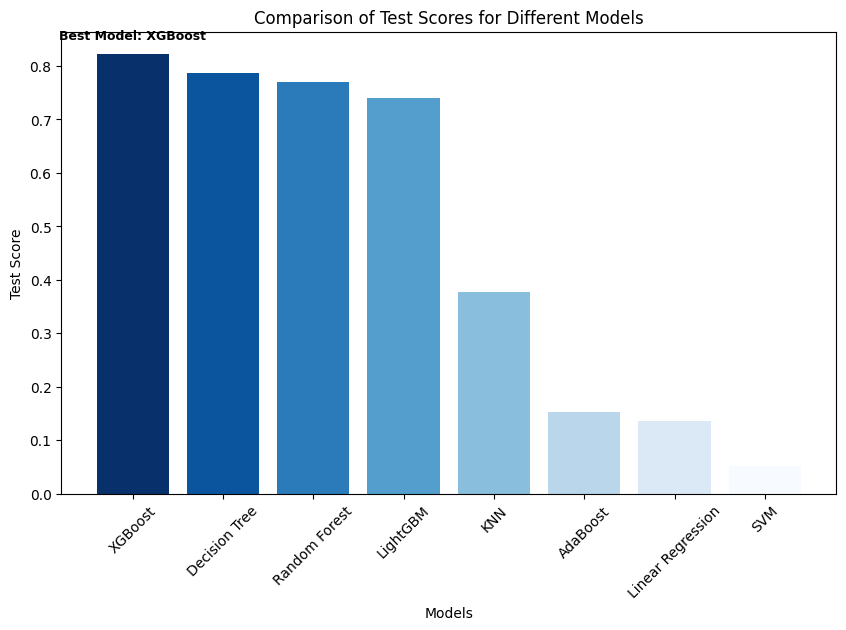

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM', 'XGBoost', 'KNN', 'SVM']
test_scores = [0.134912, 0.786600, 0.769124, 0.151991, 0.739764, 0.823174, 0.377289, 0.052331]

# Sort the models and test scores in descending order
sorted_indices = np.argsort(test_scores)[::-1]
models = [models[i] for i in sorted_indices]
test_scores = [test_scores[i] for i in sorted_indices]

# Define the colors
colors = np.linspace(0, 1, len(models))  # Generate a range of colors from 0 (red) to 1 (blue)

# Plot the test scores
plt.figure(figsize=(10, 6))
plt.bar(models, test_scores, color=plt.cm.Blues_r(colors))
plt.xlabel('Models')
plt.ylabel('Test Score')
plt.title('Comparison of Test Scores for Different Models')
plt.xticks(rotation=45)

# Find the index of the best model
best_model_index = test_scores.index(max(test_scores))
best_model = models[best_model_index]

# Annotate the best model
plt.annotate(f'Best Model: {best_model}', (best_model_index, max(test_scores)), xytext=(0, 10),
             textcoords='offset points', ha='center', fontsize=9, fontweight='bold')

# Show the plot
plt.show()


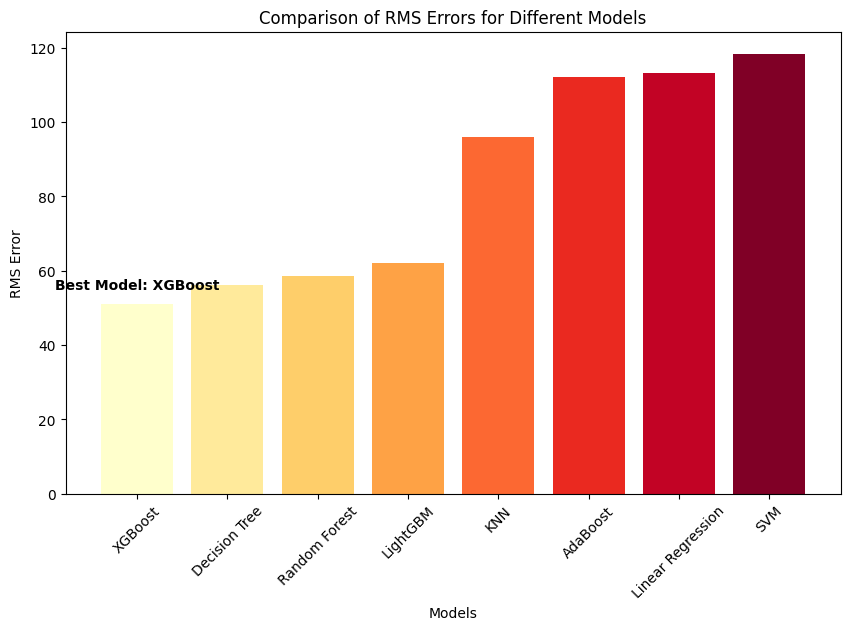

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM', 'XGBoost', 'KNN', 'SVM']
rms_errors = [113.199326, 56.222559, 58.479426, 112.076365, 62.086482, 51.178454, 96.041070, 118.479182]

# Sort the models and RMS errors in ascending order
sorted_indices = np.argsort(rms_errors)
models = [models[i] for i in sorted_indices]
rms_errors = [rms_errors[i] for i in sorted_indices]

# Define the colors
colors = np.linspace(0, 1, len(models))  # Generate a range of colors from 0 (red) to 1 (blue)

# Plot the RMS errors
plt.figure(figsize=(10, 6))
plt.bar(models, rms_errors, color=plt.cm.YlOrRd(colors))
plt.xlabel('Models')
plt.ylabel('RMS Error')
plt.title('Comparison of RMS Errors for Different Models')
plt.xticks(rotation=45)

# Find the index of the best model
best_model_index = rms_errors.index(min(rms_errors))
best_model = models[best_model_index]

# Annotate the best model
plt.annotate(f'Best Model: {best_model}', (best_model_index, min(rms_errors)), xytext=(0, 10),
             textcoords='offset points', ha='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
X = store.drop(['Profit'],axis=1)
Y = store['Profit']
X1 = X.select_dtypes('O')

for col in X1.columns:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(X1[col].values)
X= X.drop('Row ID', axis=1)
X
# Define the original data (considering the first 10 inputs)
original_data = df.head(10)

# Make predictions on the original data using the trained model
original_data['Profit_Prediction'] = rm_xgb.predict(X.head(10))

# Display the comparison DataFrame
original_data[['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Prediction']]


,Sales,Quantity,Discount,Profit,Profit_Prediction
0,261.9600,2,0.00,41.9136,55.567146
1,731.9400,3,0.00,219.5820,203.730713
2,14.6200,2,0.00,6.8714,9.664077
3,957.5775,5,0.45,-383.0310,-346.269867
4,22.3680,2,0.20,2.5164,-6.418797
5,48.8600,7,0.00,14.1694,18.340023
6,7.2800,4,0.00,1.9656,4.059538
7,907.1520,6,0.20,90.7152,93.312157
8,18.5040,3,0.20,5.7825,9.237796
9,114.9000,5,0.00,34.4700,34.002972


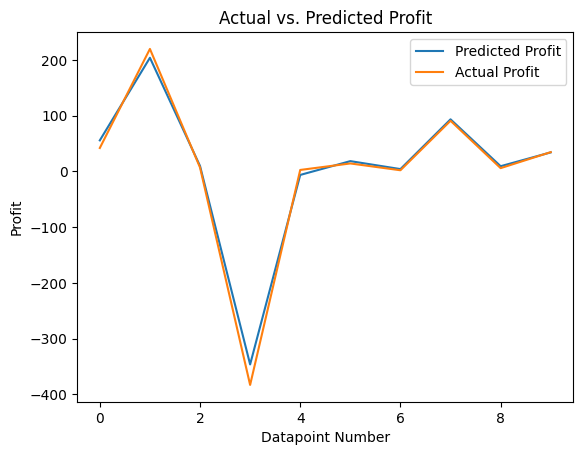

In [ ]:
import matplotlib.pyplot as plt

# Create a sequence of numbers for the x-axis
datapoint_number = range(len(original_data))

# Create the line chart
plt.plot(datapoint_number, original_data['Profit_Prediction'], label='Predicted Profit')
plt.plot(datapoint_number, original_data['Profit'], label='Actual Profit')

# Set the axis labels and title
plt.xlabel('Datapoint Number')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit')

# Add a legend
plt.legend()

# Show the plot
plt.show()
